# Module 7, Numerical fitting, continued.
(Partially adapted from Landau 2015 Chapter 7 and course notes from AST 390: Computational Astrophysics by Michael Zingale, SUNY Stony Brook)

## Linear fit version 2, using sympy and numpy.linalg
In the previous module, we performed the least-squares method for a linear fit, where we tried to minimize the  error $\chi^2$ after some analyitcal differentiation and analyitcally solving for the slope $m$ and intercept $c$. In this module we'll introduce ways to ask Python do all these for us, using $numpy.linalg$ and symbolic python $sympy$.

Let's reexamine the linear fit example, where the error to be minimized is 
$$
\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2.
$$

We'll now try to use $sympy$ to perform differentiation of $\chi^2$ with respect to the two parameters $m$ and $c$.

The following cell initiates sympy, with some standard outputs you can ignore.

In [ ]:
from sympy import init_session
init_session(use_latex="mathjax")

We then declare the variables we need to work with, and construct a single term of $\chi^2$ (without doing the summation). The results will appear as a rendered expression.

In [ ]:
m, c = symbols("m c")
xi, yi = symbols("x_i y_i")
chi2 = (m* xi + c - yi)**2
chi2

<div class="span alert alert-success">
Following examples on the sympy documentation page
    
https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
    
take the derivative of $\chi^2$ with respect to $m$ and $c$.

In [ ]:
#differentiate w.r.t. m


In [ ]:
#differentiate w.r.t. c


The above two expressions, when summed over $i$, are both set to zero to minimize $\chi^2$. So just like in the previous Module, we end up with two equations with two unknowns: $m$ and $c$. 

<div class="span alert alert-success">
Convert this set of two equations into into matrix form. Then find the numpy documentation page for numpy.linalg.solve or numpy.linalg.inv, and follow their examples to solve for $m$ and $c$. The solution should be the same as what you obtained earlier.

In [ ]:
data = np.loadtxt("millikan.txt")

## Linear fit version 3, using scipy.optimize

Finally, we'll introduce the built-in scipy.optimize function leastsq() to perform least-squares fit. And example is shown below. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("millikan.txt")

xdata=data[:,0]
ydata=data[:,1]
N = len(xdata)

def model(x, coeffs):
    return coeffs[0] * x + coeffs[1]

def residuals(coeffs, y, x):
    return y - model(x, coeffs)

c0= np.array([1, 0])

from scipy.optimize import leastsq

coeffs_sol, flag = leastsq(residuals, c0, args=(ydata, xdata))
print(coeffs_sol)

x = np.linspace(0,1.3e15,200)
y = model(x, coeffs_sol)

plt.plot(data[:,0], data[:,1],'ko')
plt.plot(x,y,'b-')
plt.xlabel('$x$')
plt.ylabel('$y$')

<div class="span alert alert-success">
As we can see in the example above, we used the leastsq() function in a general setting that can apply to not only  linear fits, but any fitting problem. Following this example, try to fit the following $x$ and $y$ data to a general quadratic function $ax^2+bx+c$. And example output is given below.
</div>    
    
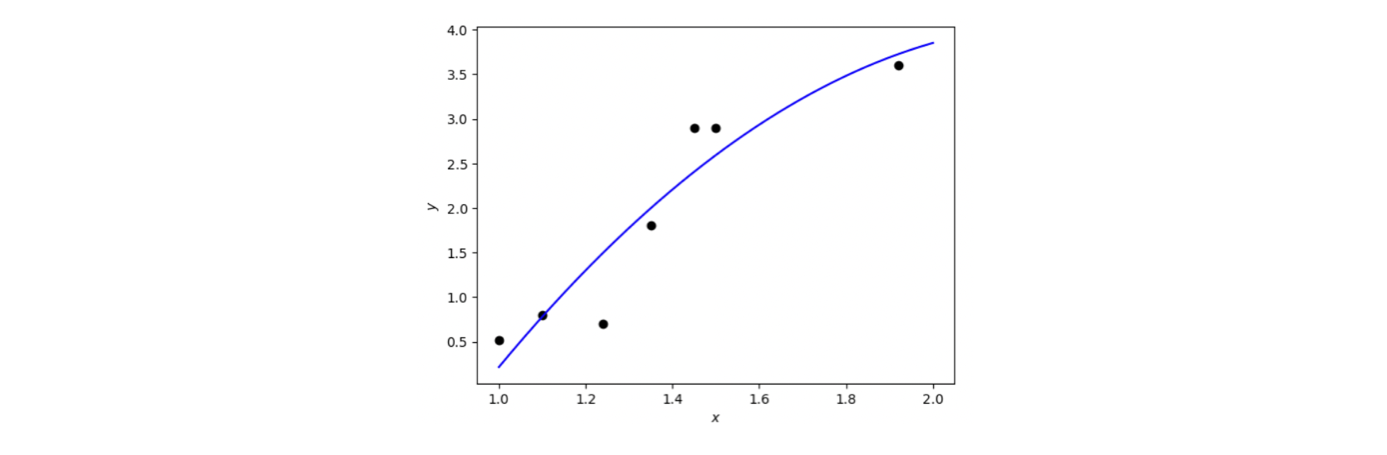

In [ ]:
xdata = np.array([1., 1.1, 1.24, 1.35, 1.451, 1.5, 1.92]) 
ydata = np.array([0.52, 0.8, 0.7, 1.8, 2.9, 2.9, 3.6]) 
